#Preparing classification data

In [ ]:
!pip install nlp-id
!pip install nltk==3.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 28.9 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.14.0-py3-none-any.whl size=8074110 sha256=179f58c0a01abb0eed517d299a188eb37c9c4f681e33b4d56c3b1bbc65bafbaf
  Stored in directory: /root/.cache/pip/wheels/16/5d/1e/051d2642dfffeb89716569b4dad1552b6e8dd980572c5e3496
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=8387caf204200e96aca1a83dde6955bf82a016e20a306ac00193e744f6d390ee
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.2.2
    Uninstalling pytest-7.2.2:
      Su

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
import pandas as pd
import numpy as np

## Data Collection

In [ ]:
pd.set_option('display.max_colwidth', None)
url = 'https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/re_dataset.csv'
df = pd.read_csv(url, encoding='latin-1')
df.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg sekate2 anjyng',1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \xf0\x9f\x98\xaa',0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut Revolusi Jiwa',0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kutil onta'",1,1,1,0,0,0,0,0,1,1,0,0


In [ ]:
url = 'https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/new_kamusalay.csv'
slang_dict = pd.read_csv(url, encoding='latin-1', header=None)
slang_dict.tail()

,0,1
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit
15166,megangin,memegang


In [ ]:
df.count()

Tweet            13169
HS               13169
Abusive          13169
HS_Individual    13169
HS_Group         13169
HS_Religion      13169
HS_Race          13169
HS_Physical      13169
HS_Gender        13169
HS_Other         13169
HS_Weak          13169
HS_Moderate      13169
HS_Strong        13169
dtype: int64

[Text(0, 0, '7608'), Text(0, 0, '5561')]

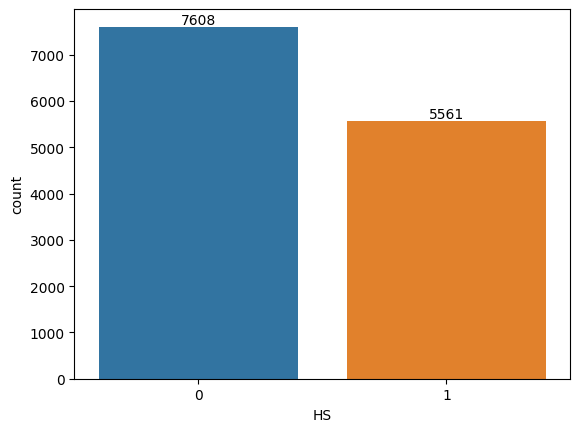

In [ ]:
import seaborn as sns
ax = sns.countplot(x='HS', data=df)
ax.bar_label(ax.containers[0])

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [ ]:
stop_words = stopwords.words('indonesian')

## Data Preprocessing

In [ ]:
from nlp_id.lemmatizer import Lemmatizer
lemmatizer = Lemmatizer()
lemmatizer.lemmatize('Saya sedang mencoba')

'saya sedang coba'

In [ ]:
def clean_tweet(x):
  x = re.sub('USER', '', x)
  x = re.sub('RT', '', x)
  x = re.sub('URL', '', x)
  x = re.sub('x[0-9a-zA-Z][0-9a-zA-Z]', '', x)
  x = x.replace('\\n', ' ')
  x = x.lower()
  x = re.sub(r'[^\w\s]', '', x)
  x = re.sub('[0-9]+', '', x)
  x = lemmatizer.lemmatize(x)
  x_tokens = word_tokenize(x)
  return x_tokens

def remove_slangs(x):
  for count, value in enumerate(x):
    slang = slang_dict.index[slang_dict[0] == value]
    if len(slang)!=0:
      translation = word_tokenize(slang_dict.iloc[slang[0]][1])
      del x[count]
      x[count:count]=translation

def process_tweet(x):
  cleaned = clean_tweet(x)
  remove_slangs(cleaned)
  cleaned = [i for i in cleaned if i not in stop_words]
  return " ".join(i for i in cleaned)

In [ ]:
df["filtered"] = df['Tweet'].apply(process_tweet)

In [ ]:
df['filtered'].tail()

13164                             berbicara ndasmu congor kate anjing
13165                                               kasur enak kunyuk
13166                                        hati hati bisu bosan duh
13167    bom real mudah deteksi bom kubur dahsyat ledak revolusi jiwa
13168                                         situ foto ya kutil onta
Name: filtered, dtype: object

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

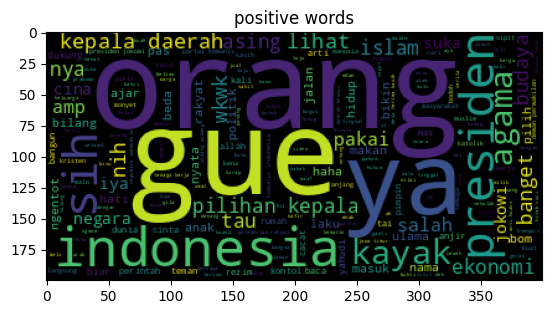

In [ ]:
data = df.loc[df['HS'] == 0]['filtered']
wc_pos = WordCloud().generate(' '.join(data))
plt.title('positive words')
plt.imshow(wc_pos)

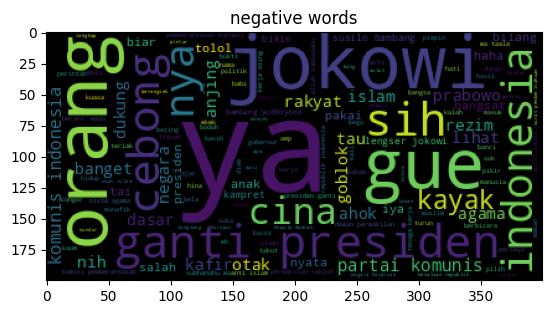

In [ ]:
data = df.loc[df['HS'] == 1]['filtered']
wc_neg = WordCloud().generate(' '.join(data))
plt.title('negative words')
plt.imshow(wc_neg)

In [ ]:
remove_words = ['ya', 'orang', 'nya', 'sih', 'indonesia', 'gue', 'kayak']
def remove_common_word(x):
  x_tokens = word_tokenize(x)
  no_slang = [i for i in x_tokens if i not in remove_words]
  return " ".join(str(i) for i in no_slang)

In [ ]:
df["filtered"] = df['filtered'].apply(remove_common_word)

In [ ]:
df.to_csv('output.csv', encoding = 'utf-8-sig')

#Model training (run dari sini aja)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 16k9X9Ux_4DUCpAWhb4Ps8vtoykI1Wwc1 -O 'data.csv'

Downloading...
From: https://drive.google.com/uc?id=16k9X9Ux_4DUCpAWhb4Ps8vtoykI1Wwc1
To: /content/data.csv
100% 2.78M/2.78M [00:00<00:00, 181MB/s]


In [ ]:
df = pd.read_csv('/content/data.csv')
df = df.dropna(axis=0, subset=['filtered'])
df.head()

,Unnamed: 0,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,filtered
0,0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1,1,1,0,0,0,0,0,1,1,0,0,cowok usaha lacak perhati lantas remeh perhati kasih khusus basic cowok bego
1,1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',0,1,0,0,0,0,0,0,0,0,0,0,telat tau eluedan sarap gaul cigax jifla calis licew
2,2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",0,0,0,0,0,0,0,0,0,0,0,0,kadang berpikir percaya tuhan jatuh berkalikali kadang tuhan meninggalkan tuaku rencana pisah kakak pilih kristen anak ter
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',0,0,0,0,0,0,0,0,0,0,0,0,akunnku tau mata sipit lihat
4,4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir lihat dungu dungu haha


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

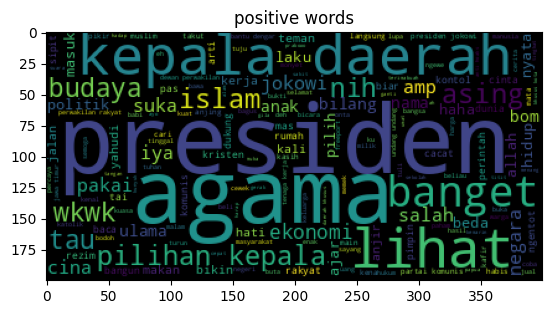

In [ ]:
data = df.loc[(df['HS'] == 0)]['filtered']
wc_pos = WordCloud().generate(' '.join(data))
plt.title('positive words')
plt.imshow(wc_pos)

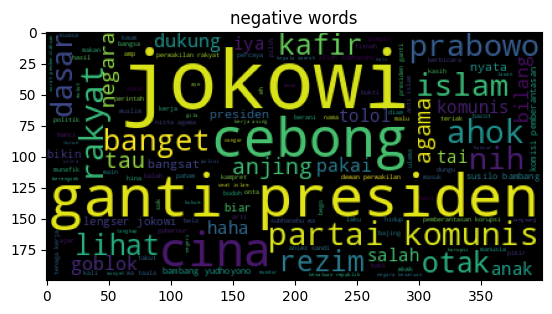

In [ ]:
data = df.loc[df['HS'] == 1]['filtered']
wc_neg = WordCloud().generate(' '.join(data))
plt.title('negative words')
plt.imshow(wc_neg)

## ML (Logistic Regression)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['filtered'],df['HS'],test_size = 0.2,random_state=40)

In [ ]:
X_test

9770                                                                          bersamasama segenap kristen bentuk keluarga allah diam tinggal roh efesus
6720                                                                                                              media oposisi jokowi mundur negarawan
8072                                                                             kait cipta lapang kerja teknologi prioritas tenaga asing bawa investor
12565       fiksi sifat imajiner naratif fiksiimajinasi hukum wajib percaya percaya sesuai narasi pikir agama hukum wajib percaya firman kitab suci iya
7972                                                                                    keren ksatria jantan berani patuh hukum banci kabur sapa polisi
                                                                              ...                                                                      
9638                                                                                    

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
X_test.shape

(2623, 1000)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(predictions,y_test)
cm

array([[1302,  294],
       [ 171,  856]])

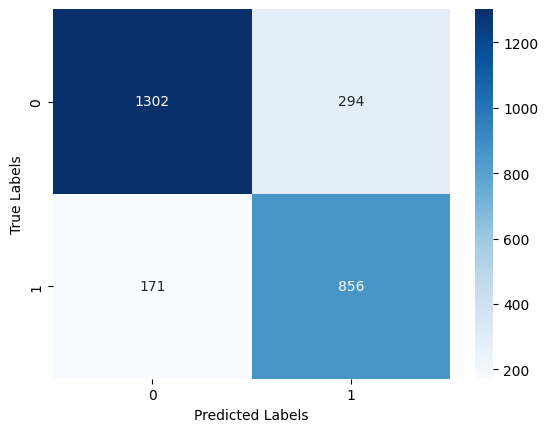

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Menampilkan plot
plt.show()

In [ ]:
print(classification_report(predictions,y_test, digits=6))

              precision    recall  f1-score   support

           0   0.883910  0.815789  0.848485      1596
           1   0.744348  0.833496  0.786403      1027

    accuracy                       0.822722      2623
   macro avg   0.814129  0.824643  0.817444      2623
weighted avg   0.829267  0.822722  0.824178      2623



In [ ]:
test = process_tweet("presiden jokowi sudah beragama islam sejak lahir")
example = vectorizer.transform([test])
print(lr.predict(example))

[0]


## Model ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import tensorflow as tf

In [ ]:
model = Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(X_train.shape[1],)))
# Hidden - Layers
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                50050     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 55,201
Trainable params: 55,201
Non-trai

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=100, callbacks=EarlyStopping(monitor='accuracy', patience=2))

Epoch 1/100
328/328 [==============================] - 3s 4ms/step - loss: 0.5212 - accuracy: 0.7256
Epoch 2/100
328/328 [==============================] - 1s 5ms/step - loss: 0.3751 - accuracy: 0.8364
Epoch 3/100
328/328 [==============================] - 1s 5ms/step - loss: 0.3265 - accuracy: 0.8607
Epoch 4/100
328/328 [==============================] - 2s 5ms/step - loss: 0.2813 - accuracy: 0.8813
Epoch 5/100
328/328 [==============================] - 2s 7ms/step - loss: 0.2365 - accuracy: 0.9042
Epoch 6/100
328/328 [==============================] - 2s 5ms/step - loss: 0.2017 - accuracy: 0.9186
Epoch 7/100
328/328 [==============================] - 2s 5ms/step - loss: 0.1636 - accuracy: 0.9358
Epoch 8/100
328/328 [==============================] - 2s 5ms/step - loss: 0.1352 - accuracy: 0.9481
Epoch 9/100
328/328 [==============================] - 1s 4ms/step - loss: 0.1224 - accuracy: 0.9504
Epoch 10/100
328/328 [==============================] - 1s 5ms/step - loss: 0.1082 - accura

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9986239671707153
Test accuracy: 0.8223408460617065


In [ ]:
y_pred = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, y_pred)
cm

82/82 [==============================] - 0s 2ms/step


array([[1242,  231],
       [ 235,  915]])

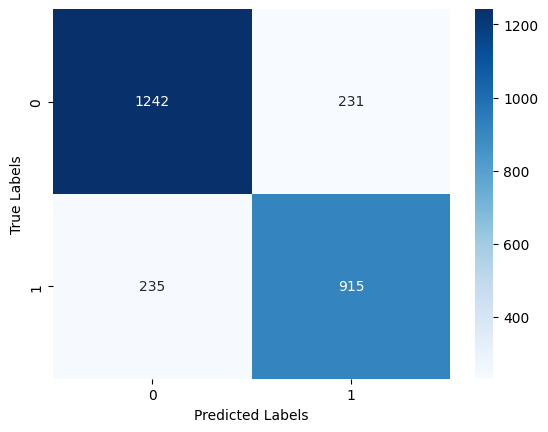

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Menampilkan plot
plt.show()

In [ ]:
print(classification_report(y_pred,y_test, digits=6))

              precision    recall  f1-score   support

       False   0.843177  0.840894  0.842034      1477
        True   0.795652  0.798429  0.797038      1146

    accuracy                       0.822341      2623
   macro avg   0.819415  0.819662  0.819536      2623
weighted avg   0.822413  0.822341  0.822375      2623



In [ ]:
print(model.predict(example)>0.5)

1/1 [==============================] - 0s 112ms/step
[[False]]
